In [61]:
import numpy as np
import pandas as pd
import glob 
import csv
import traceback
import datetime
import os
pd.options.display.max_columns=50

## Pure Exploitation Strategies

In [77]:
import numpy as np
import pandas as pd
import glob 
import csv
import traceback
import datetime
import os
pd.options.display.max_columns=50

results = glob.glob('../results/performances/risky2-*')   # quick- or www21- or fld-
list1, list2 = zip(*sorted(zip([os.stat(result).st_size for result in results], results)))

In [78]:
results

['../results/performances/risky2-result-1627481326.444-real-t-xgb-single-10.0.csv',
 '../results/performances/risky2-result-1627481851.076-real-t-random-single-10.0.csv',
 '../results/performances/risky2-result-1627481322.393-real-t-risky-single-10.0.csv',
 '../results/performances/risky2-result-1627481328.483-real-t-xgb-single-10.0.csv',
 '../results/performances/risky2-result-1627481317.732-real-t-random-single-10.0.csv',
 '../results/performances/risky2-result-1627481318.386-real-t-risky-single-10.0.csv',
 '../results/performances/risky2-result-1627481320.439-real-t-risky-single-10.0.csv',
 '../results/performances/risky2-result-1627481324.399-real-t-xgb-single-10.0.csv',
 '../results/performances/risky2-result-1627481851.208-real-t-random-single-10.0.csv']

### Collecting Result Files: Results of Individual Experiments

In [85]:
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline

full_results = defaultdict(list)

# Retrieving results
num_logs = len([i for i in list1 if i > 1000])
count= 0
for i in range(1,num_logs+1):
    try:
        df = pd.read_csv(list2[-i])
        var = 'norm-precision'
        rolling_mean7 = df[var].rolling(window=7).mean()
        rolling_mean13 = df[var].rolling(window=13).mean()
        filename = list2[-i][list2[-i].index('16'):list2[-i].index('16')+10]
        info = ','.join(list(df[['data', 'sampling', 'subsamplings']].iloc[0]))
        full_results[info].append(rolling_mean7)
        count += 1
        
# Draw individual figures
#         plt.figure()
#         plt.title(info+','+filename)
#         plt.plot(df['numWeek'], df[var], color='skyblue', label='Weekly')
#         plt.plot(df['numWeek'], rolling_mean7, color='teal', label='MA (7 weeks)')
#         plt.plot(df['numWeek'], rolling_mean14, color='blue', label='MA (14 weeks)')
#         plt.legend(loc='upper left')
#         plt.ylabel(var)
#         plt.xlabel('numWeeks')
#         plt.show()
    except:
        print('loading error:', list2[-i])
        continue
print(count)
#     plt.close()

9


In [86]:
full_results.keys()

dict_keys(['real-t,random,-', 'real-t,risky,-', 'real-t,xgb,-'])

### Synthetic data Simulation Results - Single

The number of trials for each setting (Results are averaged):
real-t,random,- 3 0.0998
real-t,risky,- 3 0.4258
real-t,xgb,- 3 0.1568


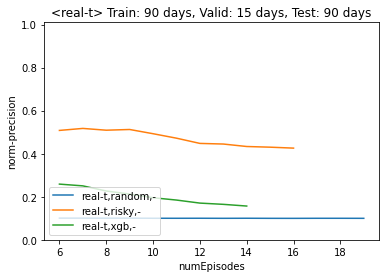

In [87]:
plt.figure()
# info = ','.join(list(df[['data', 'samplings']].iloc[0]))

result_one_dataset = [key for key in full_results.keys() if 'real-t' in key]
print('The number of trials for each setting (Results are averaged):')
for key in result_one_dataset:
    avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
#     print(pd.concat([*full_results[key]], axis=1))   # Check current running status: debug purpose
    print(key, len(full_results[key]), round(np.mean(avg_result[-1:]), 4))
    plt.plot(avg_result.index, avg_result, label=key)

# # printing test_illicit_rate
# tir = pd.read_csv(list2[-1])['test_illicit_rate'].rolling(window=7).mean()
# plt.plot(tir.index, tir, label='Test illicit rate (ref)')

plt.title('<real-t> Train: 90 days, Valid: 15 days, Test: 90 days')
plt.legend(loc='lower left')
plt.ylabel(var)
plt.xlabel('numEpisodes')
plt.ylim(0, 1.01)
plt.show()
plt.close()

In [20]:
f = plt.figure()
result_one_dataset = [key for key in full_results.keys() if 'synthetic' in key]
print('The number of trials for each setting (Results are averaged):')
for key in ['synthetic,random,-','synthetic,xgb,-','synthetic,xgb_lr,-','synthetic,tabnet,-','synthetic,DATE,-']:    # result_one_dataset:
    avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
    if key == 'synthetic,DATE,-':
        plt.plot(avg_result.index, avg_result, label='DATE → 0.290')
    if key == 'synthetic,tabnet,-':
        plt.plot(avg_result.index, avg_result, label='TabNet → 0.244')
    if key == 'synthetic,xgb,-':
        plt.plot(avg_result.index, avg_result, label='XGB → 0.241')
    if key == 'synthetic,xgb_lr,-':
        plt.plot(avg_result.index, avg_result, label='XGB+lr → 0.178')
    if key == 'synthetic,random,-':
        plt.plot(avg_result.index, avg_result, label='random → 0.102')    
    
plt.legend(loc='upper left', fontsize=12.5)
plt.vlines(23, 0, 1, linestyles ="dotted", colors ="k") 
plt.ylabel(var, fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.xticks(ticks=[-5,8,21,34,47], labels=['2013', '','','', 14], fontsize=15)
plt.yticks(fontsize=15)
plt.title('Synthetic', fontsize=15)
plt.ylabel('Norm-Rev@10%', fontsize=15)
plt.ylim(0,0.4)

plt.show()
plt.close()
f.savefig("pure-exploitation-s.pdf", bbox_inches='tight')

The number of trials for each setting (Results are averaged):


ValueError: No objects to concatenate

<Figure size 432x288 with 0 Axes>

In [7]:
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline

full_results = defaultdict(list)

# Retrieving results
num_logs = len([i for i in list1 if i > 1000])
count= 0
for i in range(1,num_logs+1):
    try:
        df = pd.read_csv(list2[-i])
        var = 'norm-precision'
        rolling_mean7 = df[var].rolling(window=7).mean()
        rolling_mean13 = df[var].rolling(window=13).mean()
        filename = list2[-i][list2[-i].index('16'):list2[-i].index('16')+10]
        info = ','.join(list(df[['data', 'sampling', 'subsamplings']].iloc[0]))
        full_results[info].append(rolling_mean13)
        count += 1
        
# Draw individual figures
#         plt.figure()
#         plt.title(info+','+filename)
#         plt.plot(df['numWeek'], df[var], color='skyblue', label='Weekly')
#         plt.plot(df['numWeek'], rolling_mean7, color='teal', label='MA (7 weeks)')
#         plt.plot(df['numWeek'], rolling_mean14, color='blue', label='MA (14 weeks)')
#         plt.legend(loc='upper left')
#         plt.ylabel(var)
#         plt.xlabel('numWeeks')
#         plt.show()
    except:
        print('loading error:', list2[-i])
        continue
print(count)
#     plt.close()

26


In [8]:
full_results.keys()

dict_keys(['synthetic,random,-', 'synthetic,tabnet,-', 'synthetic,xgb_lr,-', 'synthetic,DATE,-', 'synthetic,xgb,-'])

### Synthetic data Simulation Results - Single

The number of trials for each setting (Results are averaged):
synthetic,random,- 5 0.1013
synthetic,tabnet,- 5 0.2376
synthetic,xgb_lr,- 5 0.1792
synthetic,DATE,- 6 0.2765
synthetic,xgb,- 5 0.2293


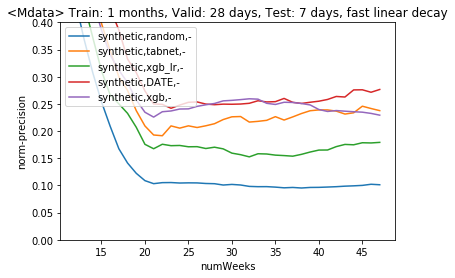

In [9]:
plt.figure()
# info = ','.join(list(df[['data', 'samplings']].iloc[0]))

result_one_dataset = [key for key in full_results.keys() if 'synthetic' in key]
print('The number of trials for each setting (Results are averaged):')
for key in result_one_dataset:
    avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
#     print(pd.concat([*full_results[key]], axis=1))   # Check current running status: debug purpose
    print(key, len(full_results[key]), round(np.mean(avg_result[-1:]), 4))
    plt.plot(avg_result.index, avg_result, label=key)

# # printing test_illicit_rate
# tir = pd.read_csv(list2[-1])['test_illicit_rate'].rolling(window=7).mean()
# plt.plot(tir.index, tir, label='Test illicit rate (ref)')

plt.title('<Mdata> Train: 1 months, Valid: 28 days, Test: 7 days, fast linear decay')
plt.legend(loc='upper left')
plt.ylabel(var)
plt.xlabel('numWeeks')
plt.ylim(0, 0.4)
plt.show()
plt.close()

The number of trials for each setting (Results are averaged):


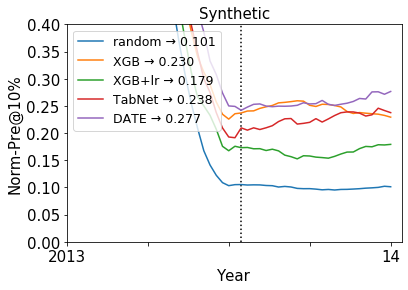

In [10]:
f = plt.figure()
result_one_dataset = [key for key in full_results.keys() if 'synthetic' in key]
print('The number of trials for each setting (Results are averaged):')
for key in ['synthetic,random,-','synthetic,xgb,-','synthetic,xgb_lr,-','synthetic,tabnet,-','synthetic,DATE,-']:    # result_one_dataset:
    avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
    if key == 'synthetic,DATE,-':
        plt.plot(avg_result.index, avg_result, label='DATE → 0.277')
    if key == 'synthetic,tabnet,-':
        plt.plot(avg_result.index, avg_result, label='TabNet → 0.238')
    if key == 'synthetic,xgb,-':
        plt.plot(avg_result.index, avg_result, label='XGB → 0.230')
    if key == 'synthetic,xgb_lr,-':
        plt.plot(avg_result.index, avg_result, label='XGB+lr → 0.179')
    if key == 'synthetic,random,-':
        plt.plot(avg_result.index, avg_result, label='random → 0.101')    
    
plt.legend(loc='upper left', fontsize=12.5)
plt.vlines(23, 0, 1, linestyles ="dotted", colors ="k") 
plt.ylabel(var, fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.xticks(ticks=[-5,8,21,34,47], labels=['2013', '','','', 14], fontsize=15)
plt.yticks(fontsize=15)
plt.title('Synthetic', fontsize=15)
plt.ylabel('Norm-Pre@10%', fontsize=15)
plt.ylim(0,0.4)

plt.show()
plt.close()
f.savefig("pure-exploitation-s-pre.pdf", bbox_inches='tight')